<img src="./img/6.jpg" width="500"/>

```py
def get(cur):
    if prefer_base_case: return 1.0
    if not_prefer_base_case: return 0.0

    sub_1_prob = get(sub_1)
    sub_2_prob = get(sub_2)
    sub_3_prob = get(sub_3)
    
    return 0.25*sub_1_prob + 0.4*sub_2_prob + 0.35*sub_3_prob
```

# [Soup Servings](https://leetcode.com/problems/soup-servings/)
- **Given**:
    + `N` ml of each 2 types of soups `A` and `B`
    + We can do 4 types of operations. Each time 1 op is selected randomly with prob = 0.25
        + 1. Serve `100` ml of **soup A** and `0` ml of **soup B**
        + 2. Serve `75` ml of **soup A** and `25` ml of **soup B**
        + 3. Serve `50` ml of **soup A** and `50` ml of **soup B**
        + 4. Serve `25` ml of **soup A** and `75` ml of **soup B**
    + If the remaining volume of soup is not enough to complete the operation, we will serve as much as possible
- **Return**: The final sum probability such
    + soup A empty first `x1.0`
    + soup A and soup B empty at the same time `x0.5`
    
#### Constraints
- $0 \leq N \leq 10^9$

#### Example

```
Input: N = 50
Output: 0.625
Explanation: 0.25*1.0 + 0.25*1.0 + 0.25*0.5
    + Choose 1: A empty 1st: 0.25*1.0
    + Choose 2: A empty 1st: 0.25*1.0
    + Choose 3: A,B empty at the same time:  0.25*0.5
    + Choose 4: B empty 1st: 0

Input: N = 100
Output: 0.71875
```

#### Solution $O(N^2)$
- Use prob tree recur to solve $O(N^2)$. But if we observe the pattern, as N increase the function f converges

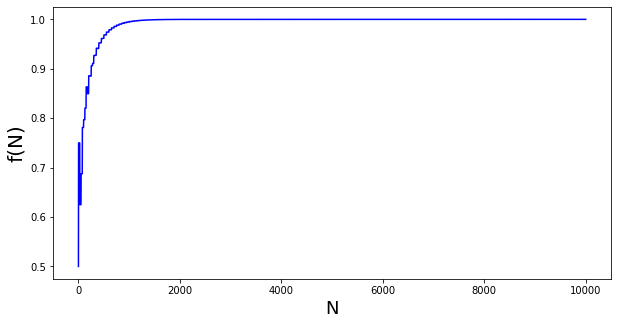

In [1]:
from functools import lru_cache
import numpy as np
import matplotlib.pyplot as plt

@lru_cache(maxsize=None)
def f(A, B):
    if A <= 0 and B > 0: return 1.0
    if A <= 0 and B <= 0: return 0.5
    if B <= 0 and A > 0: return 0.0
    return 0.25*(f(A-100,B) + f(A-100,B) + f(A-50, B-50) + f(A-25, B-75))

N = np.arange(0, int(1e4), 1)
f_N = np.array([f(n,n) for n in N])

plt.figure(figsize=(10,5))
plt.plot(
    N, f_N,
    color='b', linewidth=1.5)
plt.xlabel('N', fontsize=18)
plt.ylabel('f(N)', fontsize=20)
plt.show()

```Cpp
class Solution {
public:
    unordered_map<int, unordered_map<int, double>> cache;
    double get(int A, int B) {
        if(A <= 0 && B > 0) return 1.0; // A empty before B
        if(A <= 0 && B <= 0) return 0.5; // A,B empty at the same time
        if(B <= 0 && A > 0) return 0.0; // B empty before A
        if(cache[A][B] != 0) return cache[A][B];

        double prob = 0.0;
        prob += 0.25*get(A - 100, B);
        prob += 0.25*get(A - 75, B - 25);
        prob += 0.25*get(A - 50, B - 50);
        prob += 0.25*get(A - 25, B - 75);

        return cache[A][B] = prob;
    }
    double soupServings(int n) {
        if(n > 4800) return 1.0;
        return get(n, n);
    }
};
```